In [1]:
!pip install --quiet pandas==1.1.2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

% cd '/content/drive/My Drive/cricket-analysis'

Mounted at /content/drive
/content/drive/My Drive/cricket-analysis


In [3]:
!ls -lath

total 70K
-rw------- 1 root root 37K Oct  2 18:50 kohli.pkl
-rw------- 1 root root 33K Oct  2 18:50 sharma.pkl


In [4]:
import pandas as pd
import numpy as np

from pickle import Unpickler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df_sharma = pd.read_pickle('sharma.pkl')
print(f"sharma partnerships: {df_sharma.shape}")

sharma partnerships: (417, 9)


In [7]:
# number of matches RG Sharma and V Kohli had partnerships
m1 = set(df_sharma[df_sharma['partner'] == 'V Kohli']['dom'].unique())
print(f"Number of partnerships with V Kohli = {len(m1)}")

Number of partnerships with V Kohli = 78


In [40]:
df_sharma.head()

,partner,total_runs,total_deliveries,runs_sharma,dom,result,home_venue,win_toss,bat_first
0,S Dhawan,136,150,64,2017-06-04,1,0,0,1
1,V Kohli,56,73,27,2017-06-04,1,0,0,1
2,S Dhawan,23,33,12,2017-06-11,1,0,1,0
3,S Dhawan,87,88,41,2017-06-15,1,0,1,0
4,V Kohli,178,153,82,2017-06-15,1,0,1,0


In [8]:
def null_cols(data):

    """
    This function takes a dataframe df and shows the % null values in each column

    """
    nulls = data.isna().mean()*100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "feature", 0: "% nulls"})
    return nulls

null_cols(df_sharma)

,feature,% nulls
0,bat_first,0.0
1,win_toss,0.0
2,home_venue,0.0
3,result,0.0
4,dom,0.0
5,runs_sharma,0.0
6,total_deliveries,0.0
7,total_runs,0.0
8,partner,0.0


### Batting when India won toss or lost toss

In [9]:
sharma_toss1 = df_sharma[df_sharma['win_toss']==1]
sharma_toss0 = df_sharma[df_sharma['win_toss']==0]

sharma_plist = ['V Kohli', 'S Dhawan', 'AM Rahane', 'MS Dhoni', 'SK Raina', 'G Gambhir', 'Yuvraj Singh']

In [10]:
# the matches where India won the toss
agg_sharma1 = sharma_toss1.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma1 = agg_sharma1.reindex(sharma_plist)

agg_sharma1['AvgPsRuns'] = agg_sharma1['TLPsRuns']/agg_sharma1['PsCount']
agg_sharma1['AvgPsRunsSharma'] = agg_sharma1['TLRunsSharma']/agg_sharma1['PsCount']
agg_sharma1['StrikeRate'] = agg_sharma1['TLPsRuns']/agg_sharma1['TLPsBalls']
# agg_sharma1.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

In [11]:
# the matches where India lost the toss
agg_sharma2 = sharma_toss0.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma2 = agg_sharma2.reindex(sharma_plist)

agg_sharma2['AvgPsRuns'] = agg_sharma2['TLPsRuns']/agg_sharma2['PsCount']
agg_sharma2['AvgPsRunsSharma'] = agg_sharma2['TLRunsSharma']/agg_sharma2['PsCount']
agg_sharma2['StrikeRate'] = agg_sharma2['TLPsRuns']/agg_sharma2['TLPsBalls']
# agg_sharma2.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

In [12]:
p1 = agg_sharma1.reset_index()
p2 = agg_sharma2.reset_index()
p1
p2

,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,2250,2260,33,1092,0.666667,1,68.181818,33.090909,0.995575
1,S Dhawan,2091,2483,51,947,0.686275,1,41.000000,18.568627,0.842126
2,AM Rahane,410,550,12,183,0.583333,1,34.166667,15.250000,0.745455
3,MS Dhoni,599,661,18,303,0.611111,1,33.277778,16.833333,0.906203
4,SK Raina,796,818,20,365,0.700000,1,39.800000,18.250000,0.973105
5,G Gambhir,69,124,7,22,0.714286,1,9.857143,3.142857,0.556452
6,Yuvraj Singh,212,310,8,105,0.250000,1,26.500000,13.125000,0.683871


,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,2619,2897,45,1324,0.577778,0,58.200000,29.422222,0.904039
1,S Dhawan,2650,3022,55,1158,0.618182,0,48.181818,21.054545,0.876903
2,AM Rahane,727,844,12,377,0.500000,0,60.583333,31.416667,0.861374
3,MS Dhoni,815,861,12,479,0.583333,0,67.916667,39.916667,0.946574
4,SK Raina,273,324,10,133,0.400000,0,27.300000,13.300000,0.842593
5,G Gambhir,253,295,10,113,0.600000,0,25.300000,11.300000,0.857627
6,Yuvraj Singh,237,274,12,94,0.500000,0,19.750000,7.833333,0.864964


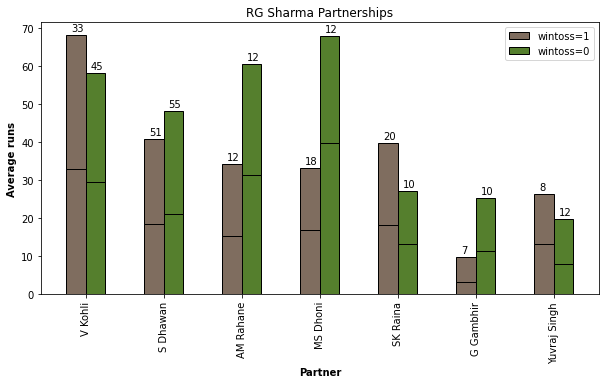

In [13]:
# libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
 
# set width of bar
barWidth = 0.25
 
# set height of bars
bars1rg = p1['AvgPsRunsSharma']
bars1 = p1['AvgPsRuns'] - p1['AvgPsRunsSharma']
bars2rg = p2['AvgPsRunsSharma']
bars2 = p2['AvgPsRuns'] - p2['AvgPsRunsSharma']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1rg, color='#7f6d5f', width=barWidth, edgecolor='black', label='wintoss=1')
plt.bar(r1, bars1, bottom=bars1rg, color='#7f6d5f', edgecolor='black', width=barWidth)
plt.bar(r2, bars2rg, color='#557f2d', width=barWidth, edgecolor='black', label='wintoss=0')
plt.bar(r2, bars2, bottom=bars2rg, color='#557f2d', edgecolor='black', width=barWidth)

# Create labels on top of each bar
label1 = p1['PsCount']
label2 = p2['PsCount']
for i in range(len(r1)):
  plt.text(x=r1[i]-barWidth/4, y=bars1[i]+bars1rg[i]+1, s=label1[i], size=10)
  plt.text(x=r2[i]-barWidth/4, y=bars2[i]+bars2rg[i]+1, s=label2[i], size=10)

# Add xticks in the middle of the group bars
plt.xticks([r + barWidth/2 for r in range(len(bars1))], p1['partner'], rotation=90)

# Add axes labels and title
plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Average runs', fontweight='bold')
plt.title("RG Sharma Partnerships")

# Create legend & Show graphic
plt.legend()
plt.show();

### Breakdown of matches where India won toss (wintoss=1) into batfirst = 1 or 0

In [14]:
sharma_toss1bat1 = df_sharma[(df_sharma['win_toss']==1) & (df_sharma['bat_first']==1)]
sharma_toss1bat0 = df_sharma[(df_sharma['win_toss']==1) & (df_sharma['bat_first']==0)]

sharma_plist = ['V Kohli', 'S Dhawan', 'AM Rahane', 'MS Dhoni', 'SK Raina', 'G Gambhir', 'Yuvraj Singh']

In [15]:
# the matches where India won the toss
agg_sharma1 = sharma_toss1bat1.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'),
                                             BatFirst=('bat_first', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma1 = agg_sharma1.reindex(sharma_plist)

agg_sharma1['AvgPsRuns'] = agg_sharma1['TLPsRuns']/agg_sharma1['PsCount']
agg_sharma1['AvgPsRunsSharma'] = agg_sharma1['TLRunsSharma']/agg_sharma1['PsCount']
agg_sharma1['StrikeRate'] = agg_sharma1['TLPsRuns']/agg_sharma1['TLPsBalls']
# agg_sharma1.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

agg_sharma1

,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
partner,,,,,,,,,,
V Kohli,1070,1076,16,548,0.687500,1,1,66.875000,34.250000,0.994424
S Dhawan,794,902,18,380,0.611111,1,1,44.111111,21.111111,0.880266
AM Rahane,314,409,8,137,0.625000,1,1,39.250000,17.125000,0.767726
MS Dhoni,434,489,13,235,0.538462,1,1,33.384615,18.076923,0.887526
SK Raina,411,434,7,180,0.714286,1,1,58.714286,25.714286,0.947005
G Gambhir,40,74,5,10,0.600000,1,1,8.000000,2.000000,0.540541
Yuvraj Singh,113,171,5,43,0.200000,1,1,22.600000,8.600000,0.660819


In [16]:
# the matches where India lost the toss
agg_sharma2 = sharma_toss1bat0.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'),
                                             BatFirst=('bat_first', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma2 = agg_sharma2.reindex(sharma_plist)

agg_sharma2['AvgPsRuns'] = agg_sharma2['TLPsRuns']/agg_sharma2['PsCount']
agg_sharma2['AvgPsRunsSharma'] = agg_sharma2['TLRunsSharma']/agg_sharma2['PsCount']
agg_sharma2['StrikeRate'] = agg_sharma2['TLPsRuns']/agg_sharma2['TLPsBalls']
# agg_sharma2.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

In [17]:
p1 = agg_sharma1.reset_index()
p2 = agg_sharma2.reset_index()
p1
p2

,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,1070,1076,16,548,0.687500,1,1,66.875000,34.250000,0.994424
1,S Dhawan,794,902,18,380,0.611111,1,1,44.111111,21.111111,0.880266
2,AM Rahane,314,409,8,137,0.625000,1,1,39.250000,17.125000,0.767726
3,MS Dhoni,434,489,13,235,0.538462,1,1,33.384615,18.076923,0.887526
4,SK Raina,411,434,7,180,0.714286,1,1,58.714286,25.714286,0.947005
5,G Gambhir,40,74,5,10,0.600000,1,1,8.000000,2.000000,0.540541
6,Yuvraj Singh,113,171,5,43,0.200000,1,1,22.600000,8.600000,0.660819


,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,1180,1184,17,544,0.647059,1,0,69.411765,32.000000,0.996622
1,S Dhawan,1297,1581,33,567,0.727273,1,0,39.303030,17.181818,0.820367
2,AM Rahane,96,141,4,46,0.500000,1,0,24.000000,11.500000,0.680851
3,MS Dhoni,165,172,5,68,0.800000,1,0,33.000000,13.600000,0.959302
4,SK Raina,385,384,13,185,0.692308,1,0,29.615385,14.230769,1.002604
5,G Gambhir,29,50,2,12,1.000000,1,0,14.500000,6.000000,0.580000
6,Yuvraj Singh,99,139,3,62,0.333333,1,0,33.000000,20.666667,0.712230


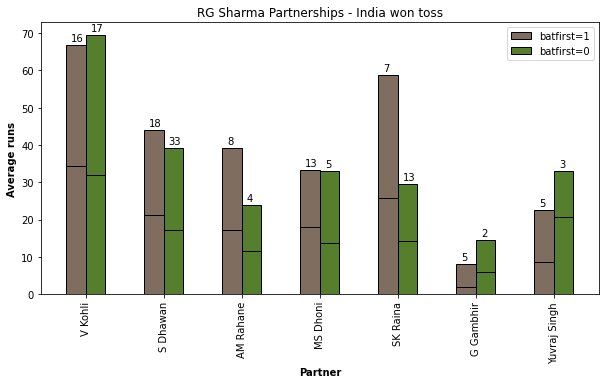

In [18]:
# libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
 
# set width of bar
barWidth = 0.25
 
# set height of bars
bars1rg = p1['AvgPsRunsSharma']
bars1 = p1['AvgPsRuns'] - p1['AvgPsRunsSharma']
bars2rg = p2['AvgPsRunsSharma']
bars2 = p2['AvgPsRuns'] - p2['AvgPsRunsSharma']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1rg, color='#7f6d5f', width=barWidth, edgecolor='black', label='batfirst=1')
plt.bar(r1, bars1, bottom=bars1rg, color='#7f6d5f', edgecolor='black', width=barWidth)
plt.bar(r2, bars2rg, color='#557f2d', width=barWidth, edgecolor='black', label='batfirst=0')
plt.bar(r2, bars2, bottom=bars2rg, color='#557f2d', edgecolor='black', width=barWidth)

# Create labels on top of each bar
label1 = p1['PsCount']
label2 = p2['PsCount']
for i in range(len(r1)):
  plt.text(x=r1[i]-barWidth/4, y=bars1[i]+bars1rg[i]+1, s=label1[i], size=10)
  plt.text(x=r2[i]-barWidth/4, y=bars2[i]+bars2rg[i]+1, s=label2[i], size=10)

# Add xticks in the middle of the group bars
plt.xticks([r + barWidth/2 for r in range(len(bars1))], p1['partner'], rotation=90)

# Add axes labels and title
plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Average runs', fontweight='bold')
plt.title("RG Sharma Partnerships - India won toss")

# Create legend & Show graphic
plt.legend()
plt.show();

### Breakdown of matches where India lost toss (wintoss=0) into batfirst = 1 or 0

In [21]:
sharma_toss0bat1 = df_sharma[(df_sharma['win_toss']==0) & (df_sharma['bat_first']==1)]
sharma_toss0bat0 = df_sharma[(df_sharma['win_toss']==0) & (df_sharma['bat_first']==0)]

sharma_plist = ['V Kohli', 'S Dhawan', 'AM Rahane', 'MS Dhoni', 'SK Raina', 'G Gambhir', 'Yuvraj Singh']

In [22]:
# the matches where India won the toss
agg_sharma1 = sharma_toss0bat1.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'),
                                             BatFirst=('bat_first', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma1 = agg_sharma1.reindex(sharma_plist)

agg_sharma1['AvgPsRuns'] = agg_sharma1['TLPsRuns']/agg_sharma1['PsCount']
agg_sharma1['AvgPsRunsSharma'] = agg_sharma1['TLRunsSharma']/agg_sharma1['PsCount']
agg_sharma1['StrikeRate'] = agg_sharma1['TLPsRuns']/agg_sharma1['TLPsBalls']
# agg_sharma1.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

agg_sharma1

,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
partner,,,,,,,,,,
V Kohli,820,947,16,436,0.562500,0,1,51.250000,27.250000,0.865892
S Dhawan,1233,1496,27,545,0.592593,0,1,45.666667,20.185185,0.824198
AM Rahane,150,201,3,73,0.666667,0,1,50.000000,24.333333,0.746269
MS Dhoni,280,209,4,172,0.500000,0,1,70.000000,43.000000,1.339713
SK Raina,193,235,9,98,0.333333,0,1,21.444444,10.888889,0.821277
G Gambhir,13,22,1,4,0.000000,0,1,13.000000,4.000000,0.590909
Yuvraj Singh,58,45,3,22,0.666667,0,1,19.333333,7.333333,1.288889


In [23]:
# the matches where India lost the toss
agg_sharma2 = sharma_toss0bat0.groupby('partner').agg(TLPsRuns=('total_runs', 'sum'),
                                             TLPsBalls=('total_deliveries', 'sum'),
                                             PsCount=('dom', 'count'),
                                             TLRunsSharma=('runs_sharma', 'sum'),
                                             WinPerc=('result', 'mean'),
                                             WinToss=('win_toss', 'mean'),
                                             BatFirst=('bat_first', 'mean'))

# restrict the partnerships to the 7 other batsman
agg_sharma2 = agg_sharma2.reindex(sharma_plist)

agg_sharma2['AvgPsRuns'] = agg_sharma2['TLPsRuns']/agg_sharma2['PsCount']
agg_sharma2['AvgPsRunsSharma'] = agg_sharma2['TLRunsSharma']/agg_sharma2['PsCount']
agg_sharma2['StrikeRate'] = agg_sharma2['TLPsRuns']/agg_sharma2['TLPsBalls']
# agg_sharma2.sort_values(by=['TLPsRuns'], ascending=[False], inplace=True)

In [24]:
p1 = agg_sharma1.reset_index()
p2 = agg_sharma2.reset_index()
p1
p2

,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,820,947,16,436,0.562500,0,1,51.250000,27.250000,0.865892
1,S Dhawan,1233,1496,27,545,0.592593,0,1,45.666667,20.185185,0.824198
2,AM Rahane,150,201,3,73,0.666667,0,1,50.000000,24.333333,0.746269
3,MS Dhoni,280,209,4,172,0.500000,0,1,70.000000,43.000000,1.339713
4,SK Raina,193,235,9,98,0.333333,0,1,21.444444,10.888889,0.821277
5,G Gambhir,13,22,1,4,0.000000,0,1,13.000000,4.000000,0.590909
6,Yuvraj Singh,58,45,3,22,0.666667,0,1,19.333333,7.333333,1.288889


,partner,TLPsRuns,TLPsBalls,PsCount,TLRunsSharma,WinPerc,WinToss,BatFirst,AvgPsRuns,AvgPsRunsSharma,StrikeRate
0,V Kohli,1799,1950,29,888,0.586207,0,0,62.034483,30.620690,0.922564
1,S Dhawan,1417,1526,28,613,0.642857,0,0,50.607143,21.892857,0.928571
2,AM Rahane,577,643,9,304,0.444444,0,0,64.111111,33.777778,0.897356
3,MS Dhoni,535,652,8,307,0.625000,0,0,66.875000,38.375000,0.820552
4,SK Raina,80,89,1,35,1.000000,0,0,80.000000,35.000000,0.898876
5,G Gambhir,240,273,9,109,0.666667,0,0,26.666667,12.111111,0.879121
6,Yuvraj Singh,179,229,9,72,0.444444,0,0,19.888889,8.000000,0.781659


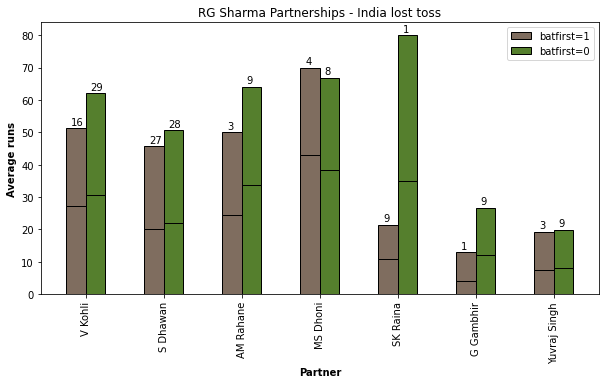

In [26]:
# libraries
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
 
# set width of bar
barWidth = 0.25
 
# set height of bars
bars1rg = p1['AvgPsRunsSharma']
bars1 = p1['AvgPsRuns'] - p1['AvgPsRunsSharma']
bars2rg = p2['AvgPsRunsSharma']
bars2 = p2['AvgPsRuns'] - p2['AvgPsRunsSharma']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1rg, color='#7f6d5f', width=barWidth, edgecolor='black', label='batfirst=1')
plt.bar(r1, bars1, bottom=bars1rg, color='#7f6d5f', edgecolor='black', width=barWidth)
plt.bar(r2, bars2rg, color='#557f2d', width=barWidth, edgecolor='black', label='batfirst=0')
plt.bar(r2, bars2, bottom=bars2rg, color='#557f2d', edgecolor='black', width=barWidth)

# Create labels on top of each bar
label1 = p1['PsCount']
label2 = p2['PsCount']
for i in range(len(r1)):
  plt.text(x=r1[i]-barWidth/4, y=bars1[i]+bars1rg[i]+1, s=label1[i], size=10)
  plt.text(x=r2[i]-barWidth/4, y=bars2[i]+bars2rg[i]+1, s=label2[i], size=10)

# Add xticks in the middle of the group bars
plt.xticks([r + barWidth/2 for r in range(len(bars1))], p1['partner'], rotation=90)

# Add axes labels and title
plt.xlabel('Partner', fontweight='bold')
plt.ylabel('Average runs', fontweight='bold')
plt.title("RG Sharma Partnerships - India lost toss")

# Create legend & Show graphic
plt.legend()
plt.show();